## Teste data scientist Nextel

### Me chamo Marcus Oliveira, estou formando no nanodegree engenheiro de Machine Learning da Udacity, e tenho muito interesse em seguir carreira como cientista de dados, sou apaixonado com ML, DL, AI, big data.

Analisando o dataset percebi que não será muito complicado de realizar previsões e cima desse modelo, afinal, basicamente se trata de um problema de aprendizagem supervisionada.

Para mostrar meu codigo vou documenta-lo explicando parte a parte. As instruções para instalação do projeto se encontram no README. Para iniciar vou importar as bibliotecas que eu acredito serem necessarias para a realização do desáfio.

In [2]:
# Importe as bibliotecas necessárias para este projeto
import numpy as np
import pandas as pd
import visuals as vs
from sklearn.cross_validation import ShuffleSplit
from IPython.display import display

# importandndo bibliotecas de visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

 Agora que as bibliotecas foram importadas é necessario ler os arquivos do data set.

In [3]:
# lendo o arquivo cvs e armazenando os dados na variavel data
data = pd.read_csv('house_sales.csv')

# armazenando os dados de price na variavel prices para trabalhar o modelo
prices = data['price']
features = data.drop('price', axis = 1)

Após ter lido os arquivos e criado as variaveis principais, prices e features, vou imprimir os 10 primeiros resultados do dataset para conseguir visualizar melhor as informações. Também vou imprimir o tamanho do dataset para poder ver se está dando tudo certo com a importação do csv.

In [4]:
display(data.head(10))
print "O conjunto de dados de imóveis tem {} pontos com {} variáveis em cada.".format(*data.shape)

,price,num_bed,num_bath,size_house,size_lot,num_floors,is_waterfront,condition,size_basement,year_built,renovation_date,zip,latitude,longitude,avg_size_neighbor_houses,avg_size_neighbor_lot
0,221900,3,1.00,1180,5650,1.0,0,3,0,1955,0,98178,47.511234,-122.256775,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,3,400,1951,1991,98125,47.721023,-122.318862,1690,7639
2,180000,2,1.00,770,10000,1.0,0,3,0,1933,0,98028,47.737927,-122.233196,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,5,910,1965,0,98136,47.520820,-122.393185,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,3,0,1987,0,98074,47.616812,-122.044901,1800,7503
5,1225000,4,4.50,5420,101930,1.0,0,3,1530,2001,0,98053,47.656118,-122.005287,4760,101930
6,257500,3,2.25,1715,6819,2.0,0,3,0,1995,0,98003,47.309720,-122.327049,2238,6819
7,229500,3,1.00,1780,7470,1.0,0,3,730,1960,0,98146,47.512294,-122.336595,1780,8113
8,323000,3,2.50,1890,6560,2.0,0,3,0,2003,0,98038,47.368407,-122.030818,2390,7570
9,662500,3,2.50,3560,9796,1.0,0,3,1700,1965,0,98007,47.600660,-122.145296,2210,8925


O conjunto de dados de imóveis tem 18448 pontos com 16 variáveis em cada.


Agora que já observei o dataset e vi que está tudo certo com a importação eu vou fazer alguns calculos basicos para entender melhor sobre a variação do preço dos imóveis.

In [5]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Mostrar as estatísticas calculadas
print "Estatísticas para os dados dos imóveis de Boston:\n"
print "Preço mínimo: ${:,.2f}".format(minimum_price)
print "Preço máximo: ${:,.2f}".format(maximum_price)
print "Preço médio: ${:,.2f}".format(mean_price)
print "Preço mediano: ${:,.2f}".format(median_price)
print "Desvio padrão dos preços: ${:,.2f}".format(std_price)

Estatísticas para os dados dos imóveis de Boston:

Preço mínimo: $78,000.00
Preço máximo: $7,700,000.00
Preço médio: $542,362.37
Preço mediano: $450,000.00
Desvio padrão dos preços: $372,003.44


## Implementação de visualização de dados

Nas proximas 16 celulas achei interessante ver como cada variavel do dataset se comparta em comparação com o preço so imóveis, essas gráficos permitem retirar insights e informações sobre cada caracteristica especifica. Com mais tempo para analizar esse modelo surgirão novos insights.

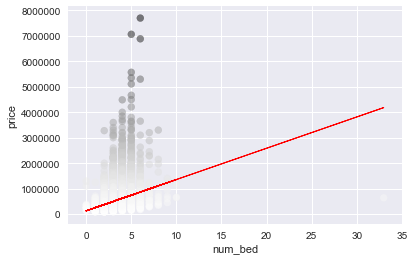

In [35]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
results = data['num_bed'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

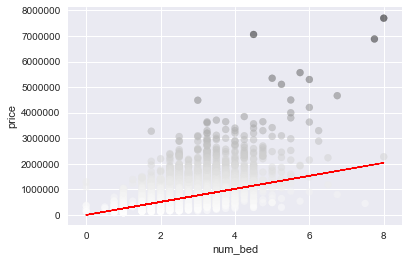

In [8]:
reg = LinearRegression()
results = data['num_bath'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

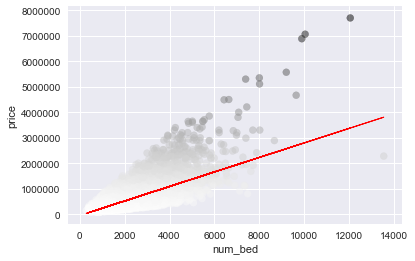

In [9]:
reg = LinearRegression()
results = data['size_house'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

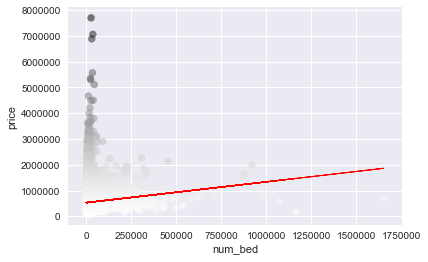

In [10]:
reg = LinearRegression()
results = data['size_lot'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

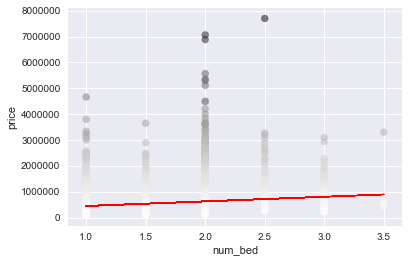

In [11]:
reg = LinearRegression()
results = data['num_floors'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

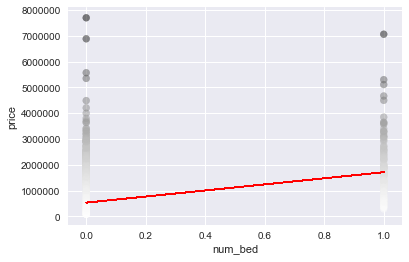

In [12]:
reg = LinearRegression()
results = data['is_waterfront'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

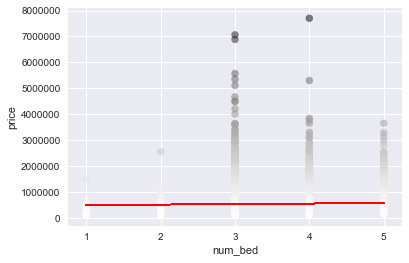

In [13]:
reg = LinearRegression()
results = data['condition'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

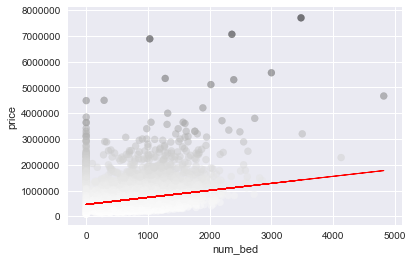

In [14]:
reg = LinearRegression()
results = data['size_basement'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

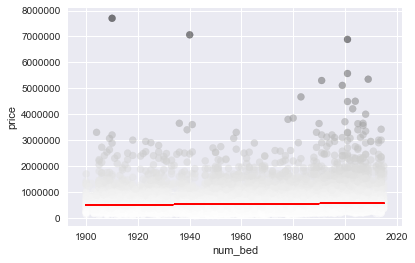

In [15]:
reg = LinearRegression()
results = data['year_built'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

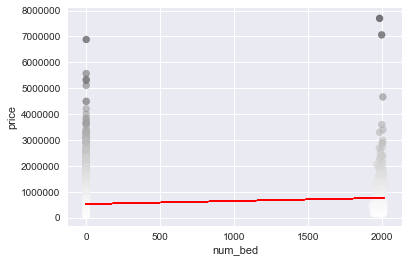

In [16]:
reg = LinearRegression()
results = data['renovation_date'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

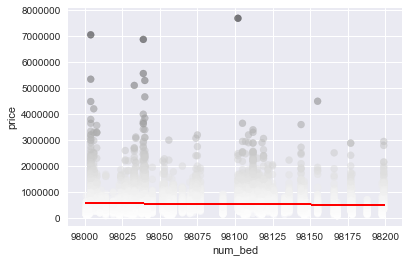

In [17]:
reg = LinearRegression()
results = data['zip'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

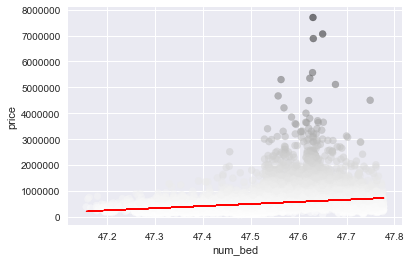

In [18]:
reg = LinearRegression()
results = data['latitude'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

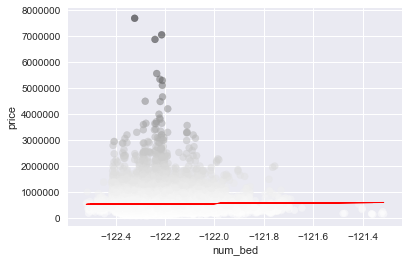

In [19]:
reg = LinearRegression()
results = data['longitude'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

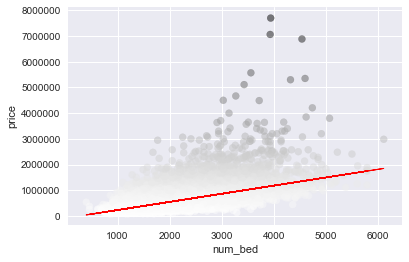

In [20]:
reg = LinearRegression()
results = data['avg_size_neighbor_houses'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

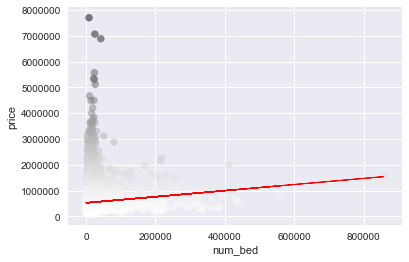

In [21]:
reg = LinearRegression()
results = data['avg_size_neighbor_lot'].values.reshape(-1,1)
reg.fit(results, prices)
plt.plot(results, reg.predict(results), color='red', linewidth=1)
plt.scatter(results, prices, alpha=0.5, c=prices)
plt.xlabel('num_bed')
plt.ylabel('price')
plt.show()

## Definindo uma Métrica de Desempenho

É difícil medir a qualidade de um modelo dado sem quantificar seu desempenho durante o treinamento e teste. Isso é geralmente feito utilizando algum tipo de métrica de desempenho, através do cálculo de algum tipo de erro, qualidade de ajuste, ou qualquer outra medida útil. 

Os valores para R2 têm um alcance de 0 a 1, que captura a porcentagem da correlação ao quadrado entre a estimativa e o valor atual da variável alvo. Um modelo R2 de valor 0 sempre falha ao estimar a variável alvo, enquanto que um modelo R2 de valor 1, estima perfeitamente a variável alvo.

Na implementação abaixo criei a função performance_metric, onde utilizei o r2_score do sklearn.metris com intuito de realizar um calculo de desempenho entre y_true e y_predict, e também atribui a pontuação do desempenho a variável score.


In [22]:
def performance_metric(y_true, y_predict):
    """Calcular e retornar a pontuação de desempenho entre
    valores reais e estimados baseado na métrica escolhida."""
    
    # Importar o 'r2_score'
    from sklearn.metrics import r2_score
    
    # TODO: Calcular a pontuação de desempenho entre 'y_true' e 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Devolver a pontuação
    return score

## Qualidade do ajuste e resultado do coefiiente R2

A implementação abaixo serve para usar a função perfomance_metric calculando o coeficiente de determinação desse modelo, os numeros foram escolhidos ao acaso. Com o R2 proximo de 1 mostra que esse modelo está trabalhando da maneira correta.

In [23]:
# Calcular o desempenho deste modelo
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "O coeficiente de determinação, R^2, do modelo é {:.3f}.".format(score)

O coeficiente de determinação, R^2, do modelo é 0.923.


## Misturar e separar os dados (treinamento e teste)

A implementação abaixod consistem em pegar o conjunto de dados de imóveis abaixo e dividir os dados em subconjuntos de treinamento e de teste. Geralmente os dados são também misturados em uma ordem aleatória ao criar os subconjuntos de treinamento e de teste para remover qualquer viés (ou erro sistemático) na ordenação do conjunto de dados.

In [24]:
from sklearn.model_selection import train_test_split  

# Misturar e separar os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

print "Separação entre treino e teste feita com êxito."

Separação entre treino e teste feita com êxito.


## Curvas de Aprendizagem

A célula de código seguinte produz quatro gráficos para um modelo de árvore de decisão com diferentes níveis de profundidade máxima. Cada gráfico visualiza a curva de aprendizagem do modelo para ambos treinamento e teste, assim que o tamanho do conjunto treinamento aumenta. Note que a região sombreada da curva de aprendizagem denota a incerteza daquela curva (medida como o desvio padrão). O modelo é pontuado em ambos os conjuntos treinamento e teste utilizando R2, o coeficiente de determinação.

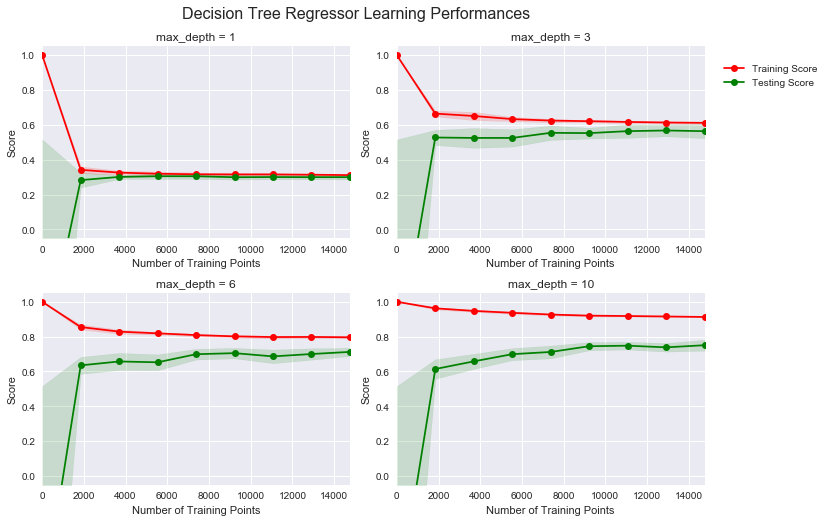

In [25]:
# Criar curvas de aprendizagem para tamanhos de conjunto de treinamento variável e produnfidades máximas
vs.ModelLearning(features, prices)

## Curvas de Complexidade

A célula de código a seguir produz um gráfico para um modelo de árvore de decisão que foi treinada e validada nos dados de treinamento utilizando profundidades máximas diferentes. O gráfico produz duas curvas de complexidade – uma para o treinamento e uma para a validação. Como a curva de aprendizagem, a área sombreada de ambas as curvas de complexidade denota uma incerteza nessas curvas, e o modelo pontuou em ambos os conjuntos de treinamento e validação utilizando a função performance_metric.

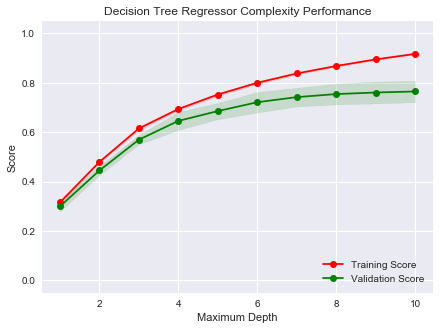

In [26]:
# Criar curva de complexidade para entender sobre os dados em max_depth diferentes
vs.ModelComplexity(x_train, y_train)

## Ajustando o modelo

Na implementação abaixo acontece o treinamento do modelo utilizando o algoritimo de árvore de decisão. Como garantia de estar utilizando um modelo otimizado treinei o modelo utilizando busca em matriz com intuito de otimizar o parâmeto de max_depth (profundidade maxima) para a árvore de decisão, esse parametro significa o entendimento sobre o número de perguntas que o algoritimo deve fazer sobre os dados antes de uma estiatica. Árvores de decisão são otimos algoritimos para se trabalhar aprendizagem supervisionada.

- Para esse modelo utilizei DecisionTreeRegressor do sklearn.tree para gerar um objeto regressor da árvore de decisão.
- Gerei um dicionário em max_depth com valores de 1 a 10.
- Utilizei make_scorer do sklearn.metrics para gerar um objeto de função de pontuação.
- Também utilizei GridSearchCV do sklearn.grid para gerar um objeto de busca em matriz.


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

def fit_model(X, y):
    """Desempenhar busca em matriz sobre o parâmetro 'max_depth' para uma
    árvore de decisão de regressão treinada nos dados de entrada [x, y]"""
    
    # Gerar conjuntos de validação-cruzada para o treinamento de dados
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)
    
    # TODO: Gerar uma árvore de decisão de regressão de objeto
    regressor = DecisionTreeRegressor(random_state=0)
    
    # TODO: Gerar um dicionário para o parâmetro 'max_depth' com um alcance de 1 a 10
    params = {'max_depth': range(1,11)}
    
    # TODO: Transformar 'performance_metric' em uma função de pontuação utilizando 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)
    
     # TODO: Gerar o objeto de busca em matriz
    grid = GridSearchCV(regressor, params, scoring_fnc, cv=cv_sets, verbose=0)
    
    # Ajustar o objeto de busca em matriz com os dados para calcular o modelo ótimo
    grid = grid.fit(X, y)
    
    # Devolver o modelo ótimo depois de realizar o ajuste dos dados
    return grid.best_estimator_

## Modelo ótimo

A implementação abaixo serve para ajudar o regressor da árvore de decisão com os dados de treinamento e gerar qual deve ser o model ideal para se trabalhar espeficamente nesse problema.

In [29]:
# Ajustar os dados de treinamento para o modelo utilizando busca em matriz
reg = fit_model(x_train, y_train)
# Produzir valores para 'max_depth'
print "O parâmetro 'max_depth' é {} para o modelo ótimo.".format(reg.get_params()['max_depth'])

O parâmetro 'max_depth' é 10 para o modelo ótimo.


## Estimativa de preço de venda dos imóveis

Para a implementação abaixo que tem o intuito de validar e testar o modelo, me imaginei como um corretor de imóveis onde eu deveria fazer previsões sobre a variação dos preços presentes no dataset. Percebi que o modelo está funcionando bem, afinal, ele fez previsões de preços de acordo com os atributos que foram informados em client_data, para essa implementação peguei os 3 primeiros resultados do dataset, onde eu ignorei o preço dos imóveis já que a ideia nesse modelo e fazer previsões sobre os preços dos imóveis.

In [33]:
# Gerar uma matriz para os dados do cliente
client_data = [[3, 1.00, 1180, 5650, 1.0, 0, 3, 0, 1955, 0, 98178,  47.511234, -122.256775, 1340, 5650], # Cliente 1
               [3, 2.25, 2570, 7242, 2.0, 0, 3, 400, 1951, 1991, 98125, 47.721023, -122.318862, 1690, 7639], # Cliente 2
               [2, 1.00, 770, 10000, 1.0, 0, 3, 0, 1933, 0, 98028, 47.737927, -122.233196, 2720, 8062]]  # Cliente 3

for i, price in enumerate(reg.predict(client_data)):
    print "Preço estimado para a casa do cliente {}: ${:,.2f}".format(i+1, price)

Preço estimado para a casa do cliente 1: $287,992.97
Preço estimado para a casa do cliente 2: $548,688.94
Preço estimado para a casa do cliente 3: $306,702.68


### Senbilidade do modelo

Um modelo otimo normalmente não é o mais robusto. Dessa forma procurei mostrar como o preço do imóvel pode variar. No codigo abaixo executei a função fit_model 10 vezes com diferentes conjuntos de treinamento e de teste para mostar como as estimativas de preço variam para um cliente especifico quando os dados são treinados.

In [34]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $287,992.97
Trial 2: $259,114.76
Trial 3: $290,540.72
Trial 4: $267,875.93
Trial 5: $270,363.86
Trial 6: $294,973.22
Trial 7: $261,969.92
Trial 8: $259,392.25
Trial 9: $258,047.28
Trial 10: $246,980.78

Range in prices: $47,992.44


## Conclusão - Aplicabilidade do Modelo

Caso exista um melhor treinamento, e assertividade nos testes, é possivel usar as configurações no mundo real. Os dados podem ser usados como parametros de testes, já que auxiliam no momento de calibrar o algoritimo de aprendizagem. Os atributos presentes conseguem sim descrever um imóvel, porém poderia ser construido um modelo um pouco mais robusto. Atravez da validação cruzada é possivel melhorar o treinamento e assertividade dos dados. 

Entendi que cheguei a um modelo razoavel. Tenho muita vontade de aprimorar minhas habilidades como cientista de dados, comecei no machine learning em setembro de 2016 e desde então cada dia gosto mais do tema. 